In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.model_selection import learning_curve
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
import time
import os
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
# Read the training data
train = pd.read_csv(r'C:\Users\DELL\Downloads\Train_data.csv')
test = pd.read_csv(r'C:\Users\DELL\Downloads\Test_data.csv')

# Display summary statistics for categorical variables
train.describe(include='object')

# Check the shape of the training dataaaa
print("Shape of training data:", train.shape)

# Check for missing values in the training data
print("Missing values in training data:")
print(train.isnull().sum())

Shape of training data: (25192, 42)
Missing values in training data:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_sr

Number of duplicate rows: 0


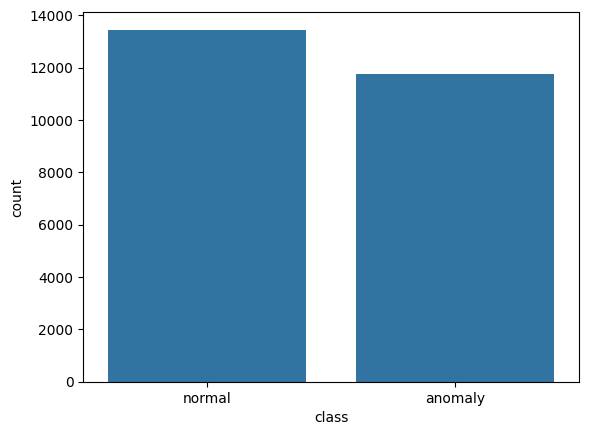

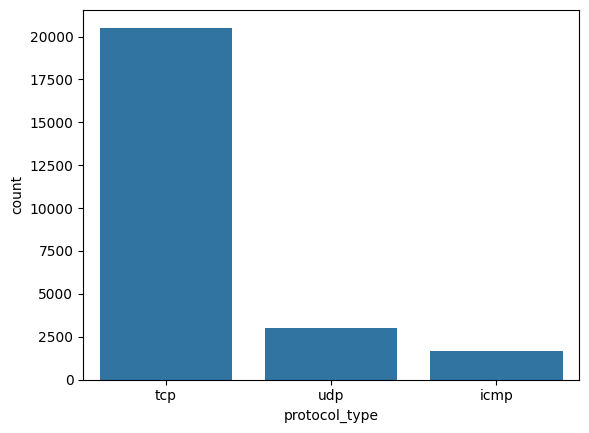

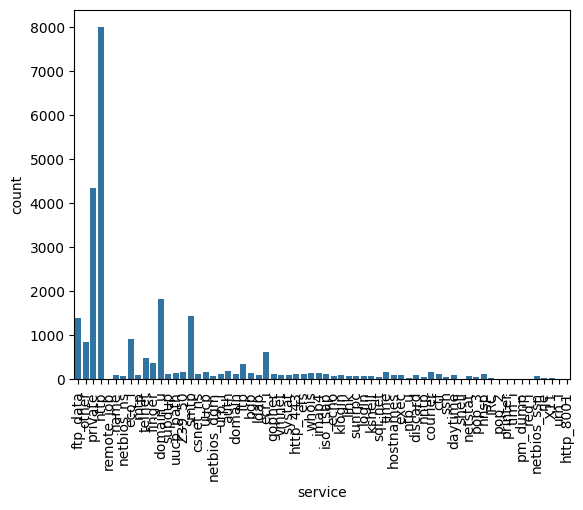

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [3]:
# Calculate the percentage of missing values for each column
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

# Check for duplicate rows in the training data
print(f"Number of duplicate rows: {train.duplicated().sum()}")

# Plot the distribution of the target variable 'class'
sns.countplot(x=train['class'])
plt.show()  # Display the plot
sns.countplot(x=train['protocol_type'])
plt.show()  # Display the plot
sns.countplot(x=train['service'])
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', pad=5)
plt.show()  # Display the plot

print('Class distribution Training set:')
print(train['class'].value_counts())

In [4]:
# Check data
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,24330.628215,3491.847174,0.000079,0.023738,0.000040,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.000000,0.000000,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2410805.402028,88830.718330,0.008910,0.260221,0.006300,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.000000,0.000000,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,279.000000,530.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,381709090.000000,5151385.000000,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.000000,0.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


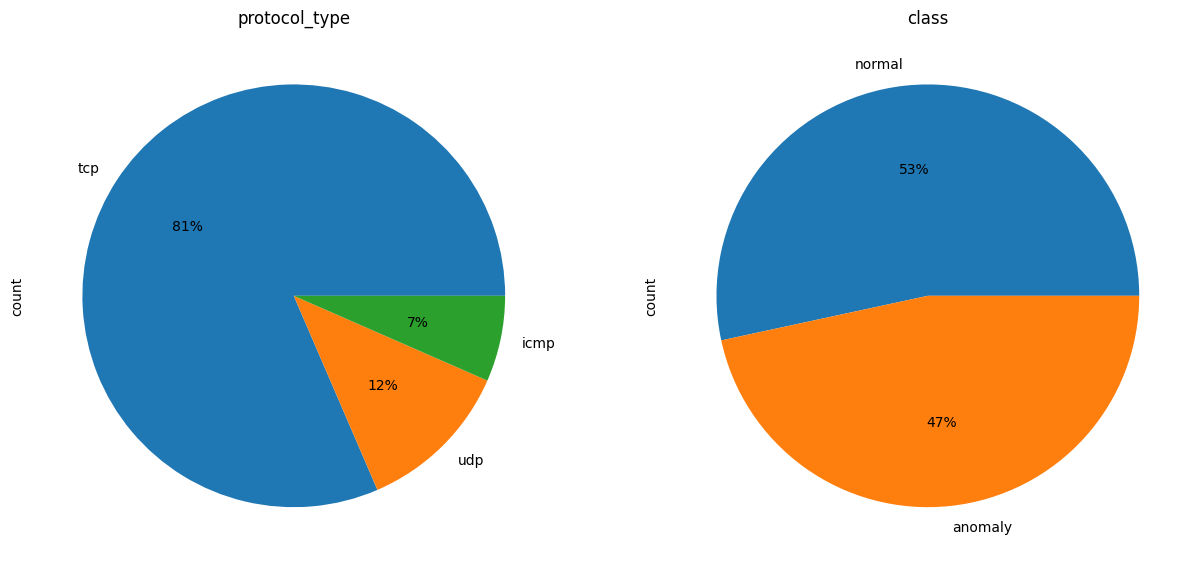

In [6]:
train.loc[train['class'] == "normal", "class"] = 'normal'
train.loc[train['class'] != 'normal', "class"] = 'anomaly'

# Define the function
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)

# Call the function
pie_plot(train, ['protocol_type', 'class'], 1, 2)
plt.show()

<Figure size 1500x300 with 0 Axes>

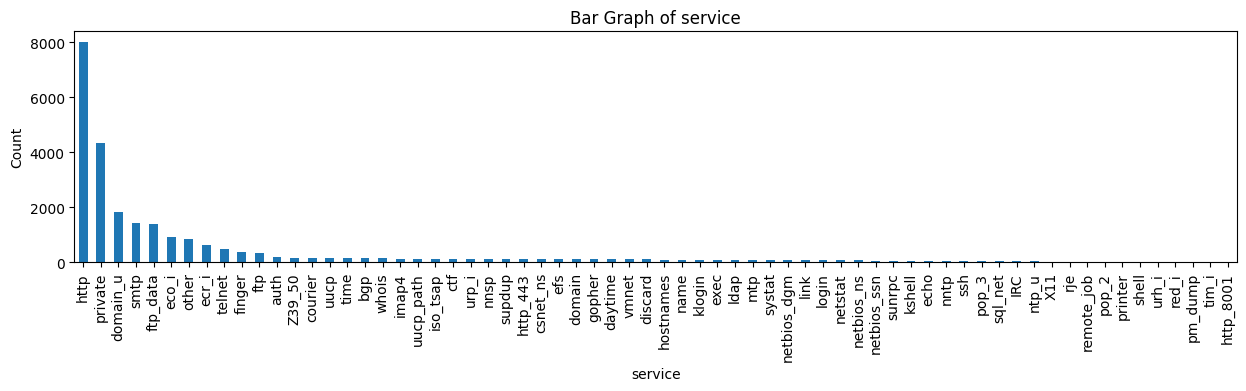

In [7]:

def bar_graph(feature, train):
    if feature in train.columns:
        data = train[feature].value_counts().to_dict()
        plt.figure(figsize=(15, 3))
        pd.Series(data).plot(kind="bar")
        plt.title(f"Bar Graph of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"Error: Column '{feature}' does not exist in the DataFrame.")

# Assuming 'df' is your DataFrame
# Set the figure size
plt.figure(figsize=(15, 3))
# Call the function to plot the bar graph for the 'service' feature
bar_graph('service', train)

<Figure size 1500x300 with 0 Axes>

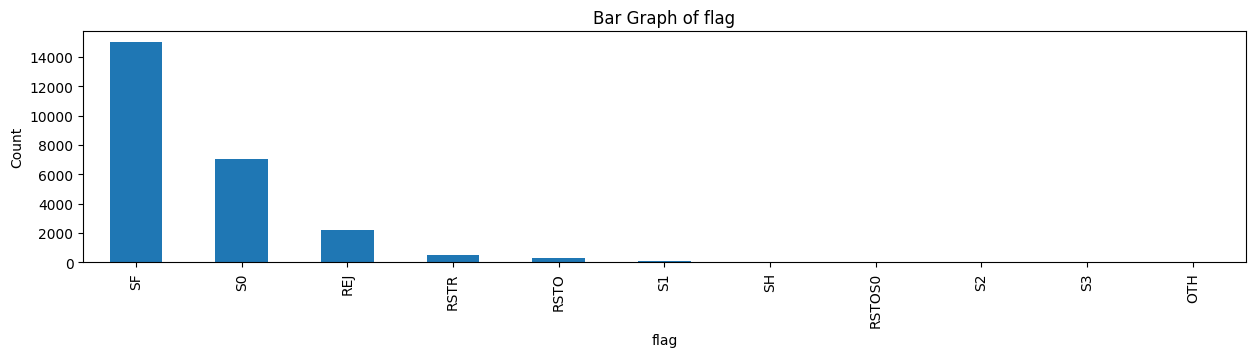

In [8]:
def bar_graph(feature, data_train):
    if feature in train.columns:
        data = train[feature].value_counts().to_dict()
        plt.figure(figsize=(15, 3))
        pd.Series(data).plot(kind="bar")
        plt.title(f"Bar Graph of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"Error: Column '{feature}' does not exist in the DataFrame.")

# Assuming 'df' is your DataFrame
# Set the figure size
plt.figure(figsize=(15, 3))
# Call the function to plot the bar graph for the 'service' feature
bar_graph('flag', train)

<Figure size 1500x300 with 0 Axes>

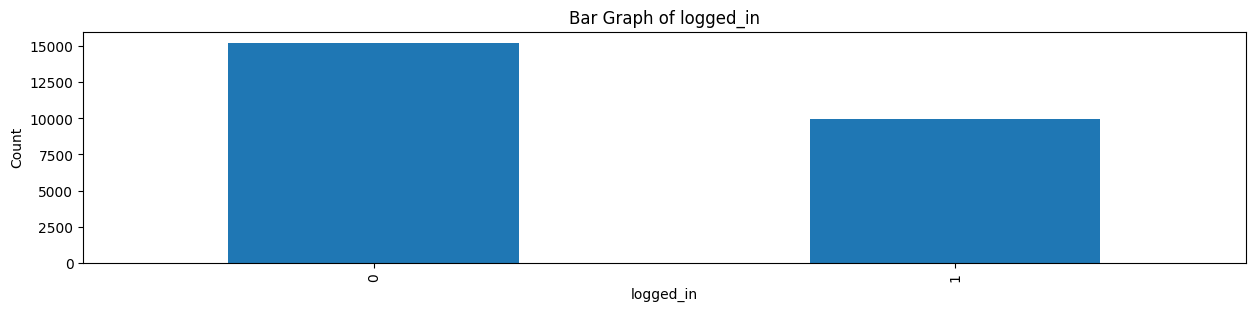

In [9]:
def bar_graph(feature, data_train):
    if feature in train.columns:
        data = train[feature].value_counts().to_dict()
        plt.figure(figsize=(15, 3))
        pd.Series(data).plot(kind="bar")
        plt.title(f"Bar Graph of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"Error: Column '{feature}' does not exist in the DataFrame.")

# Assuming 'df' is your DataFrame
# Set the figure size
plt.figure(figsize=(15, 3))
# Call the function to plot the bar graph for the 'service' feature
bar_graph('logged_in', train)

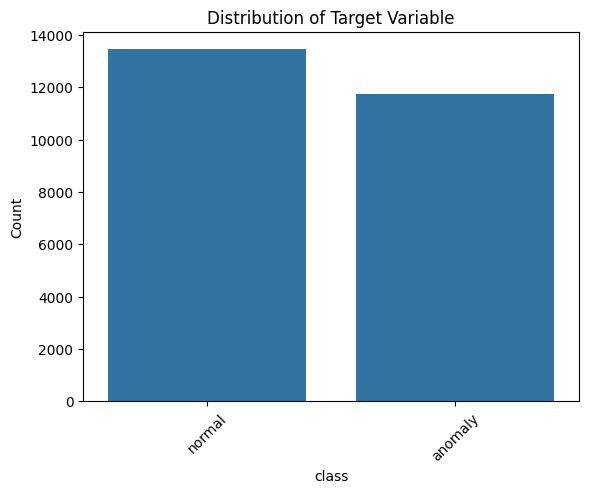

In [10]:
#plot the distrubution of the target variable
#sns.countplot(x=data_train['outcome']) 
#plt.show()

sns.countplot(x='class', data=train)
plt.title('Distribution of Target Variable')
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [11]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [12]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

print(train.head())


X_train = train.drop(['class'], axis=1)
Y_train = train['class']

rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

top_features = X_train.columns[rfe.get_support()]
print(top_features)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

print(selected_features)

X_train = X_train[selected_features]
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

print(x_train.shape)

print(x_test.shape)
 


   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   
1         0              2       41     9        146          0     0   
2         0              1       46     5          0          0     0   
3         0              1       22     9        232       8153     0   
4         0              1       22     9        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0

Training time:  0.3170614242553711
Testing time:  0.0
Training Score: 0.9288873766587274
Test Score: 0.9233924318602805


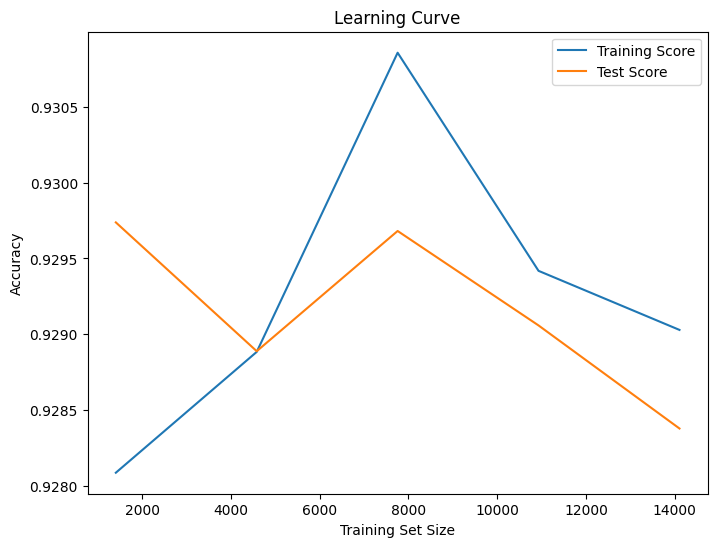

FrozenTrial(number=0, state=1, values=[0.9813442709711564], datetime_start=datetime.datetime(2024, 6, 18, 16, 34, 34, 806726), datetime_complete=datetime.datetime(2024, 6, 18, 16, 34, 35, 687826), params={'KNN_n_neighbors': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)
Train Score: 0.9831008279460134
Test Score: 0.9813442709711564
Training time:  0.017742395401000977
Testing time:  0.033843040466308594


In [13]:
import time

from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")



  

 
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lg_model, x_train, y_train, cv=5)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy


study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1) 
print(study_KNN.best_trial)


KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")






from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

FrozenTrial(number=17, state=1, values=[0.9956337655464409], datetime_start=datetime.datetime(2024, 6, 18, 16, 34, 59, 395452), datetime_complete=datetime.datetime(2024, 6, 18, 16, 34, 59, 409761), params={'dt_max_depth': 14, 'dt_max_features': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=17, value=None)
Train Score: 1.0
Test Score: 0.9943106641968775
╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.983101 │     0.981344 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.928887 │     0.923392 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.994311 │
╘═════════════════════╧════

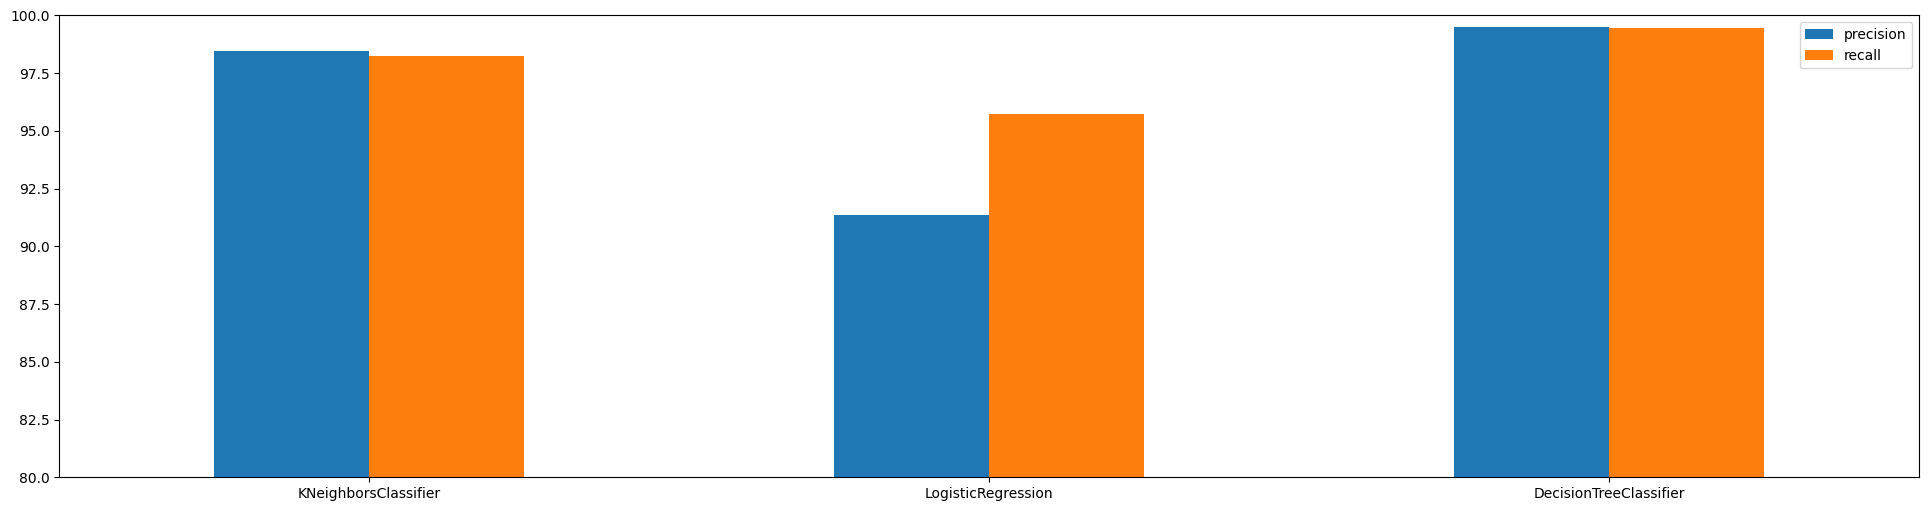

Predictions complete.
*************** KNeighborsClassifier Model Testing ***************
[[3435   63]
 [  65 3995]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      3498
     anamoly       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

**************** LogisticRegression Model Testing ****************
[[3129  369]
 [ 210 3850]]
----------------
              precision    recall  f1-score   support

      normal       0.94      0.89      0.92      3498
     anamoly       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558

************** DecisionTreeClassifier Model Testing **************
[[3484   14]
 [  22 4038]]
---------

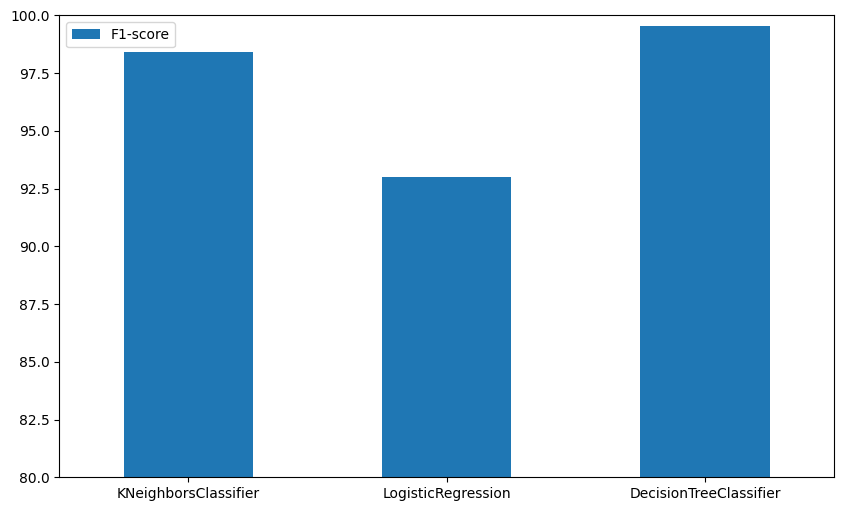

In [14]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)



dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")


data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc



scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)



def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()   

for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)
plt.show()

models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc


preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")



from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))


f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)
plt.show()

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.457528446679
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.65406473931307
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.33497536945812
Training Accuracy DecisionTreeClassifier 97.06249291142112  Test Accuracy DecisionTreeClassifier 97.08917703096057
Training Precesion DecisionTreeClassifier 97.60652570569926  Test Precesion DecisionTreeClassifier 98.024012006003
Training Recall DecisionTreeClassifier 96.85802534881243  Test Recall DecisionTreeClassifier 96.5270935960591


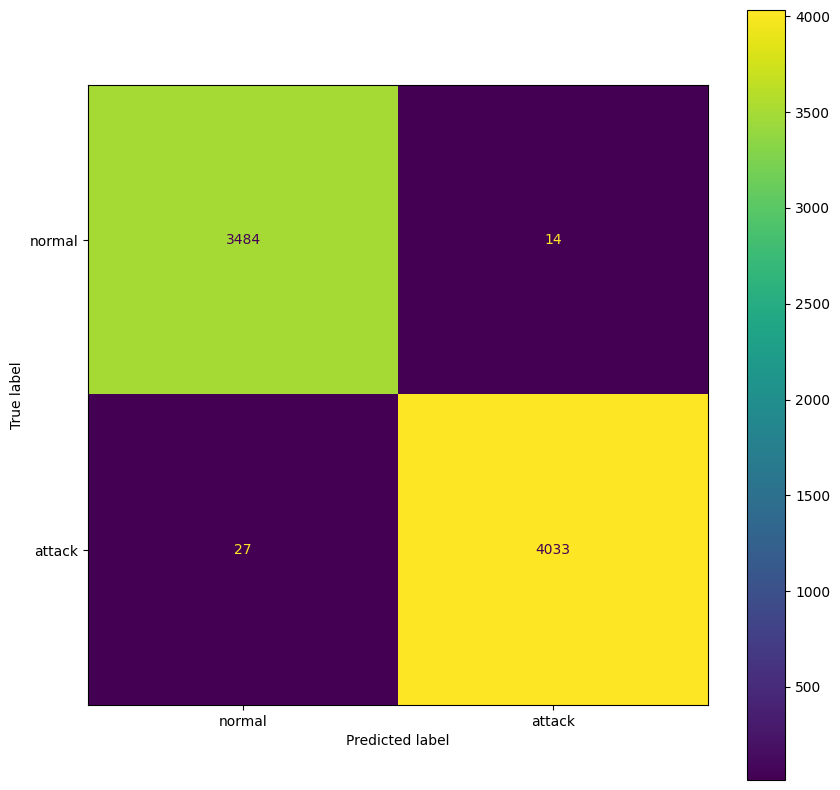

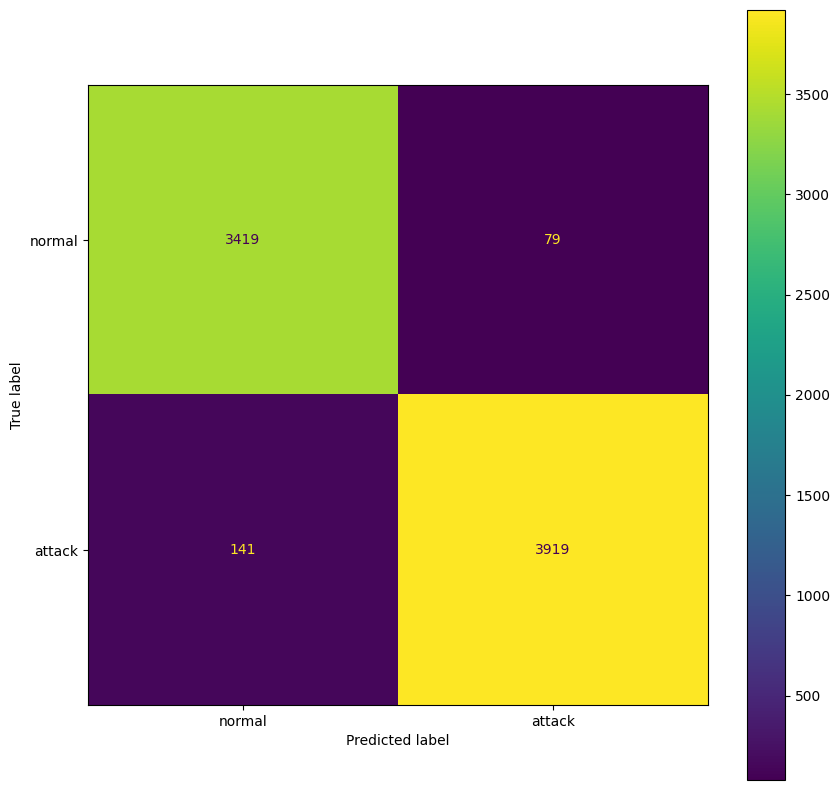

In [30]:
from sklearn import metrics
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)
evaluate_classification(dt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)


In [31]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib
import webbrowser
from flask_cors import CORS

In [17]:

app = Flask(__name__)
CORS(app, resources={r"/predict": {"origins": "*"}})  # Allow CORS for '/predict' endpoint from all origins

# Load the trained model
model = joblib.load(r'C:\Users\DELL\Downloads\DecisionTreeClassifier.pkl')
webbrowser.open_new_tab(r'C:\Users\DELL\Downloads\index (1).html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the request data
    data = request.get_json()
    
    # Convert the JSON data to a DataFrame with a default index
    df = pd.DataFrame(data, index=[0])
    
    # Encode categorical variables
    df_encoded = pd.get_dummies(df)  # Assuming one-hot encoding
    
    # Make predictions
    predictions = model.predict(df_encoded)
    
    # Return the predictions as JSON
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=False, port=5002)
    
#from sklearn.externals import joblib
#import sklearn

# Train your model
#model = DecisionTreeClassifier()
#model.fit(X_train, y_train)

# Save the model using joblib.dump with protocol 4
#joblib.dump(model, 'model.joblib', protocol=4)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
127.0.0.1 - - [16/Jun/2024 01:22:18] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2024 01:22:18] "POST /predict HTTP/1.1" 200 -
